# Multi Linear Regression Assignment
Dataset - 50_Startups
Objective - Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
Make a table containing R^2 value for each prepared model# 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [3]:
startups = pd.read_csv('E:\\Study\ASSIGNMENTS\\Multi linear regression\\50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Null Value & Data Type Check# 

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There is no Null value present in side the data set and also the data types are appopriate in all attributes

# State column contains categorical data so it's better to remove that column from the data set

# Drop State Column

In [6]:
startups1 = startups.drop('State', axis = 1)
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Rename of columns name

In [7]:
#Rename the R&D Spend as R&D_S , Administration as Admin and Marketing Spend as MktSpnd
startups2 = startups1.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MktSpnd'}, axis=1)
startups2.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Duplicate values check & drop

In [8]:
startups2[startups2.duplicated(keep = False)]

,RDS,Admin,MktSpnd,Profit


There is no duplicate value present inside the data set

# Outliers Detection in side the data

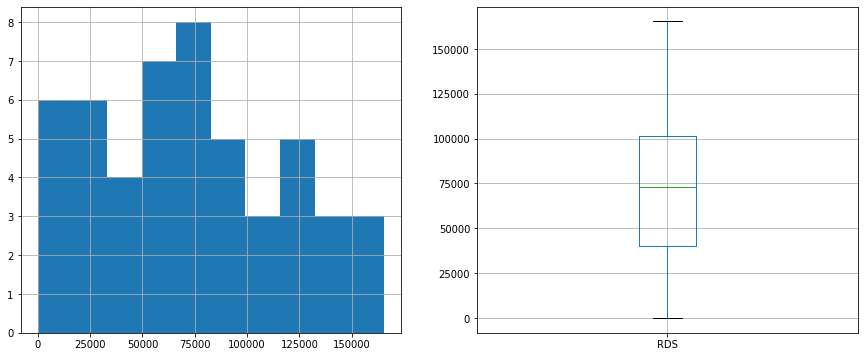

In [10]:
#check whether outliers are present in R&D_S column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['RDS'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['RDS'])

plt.show()

There is no outlier present inside the R&D_S column

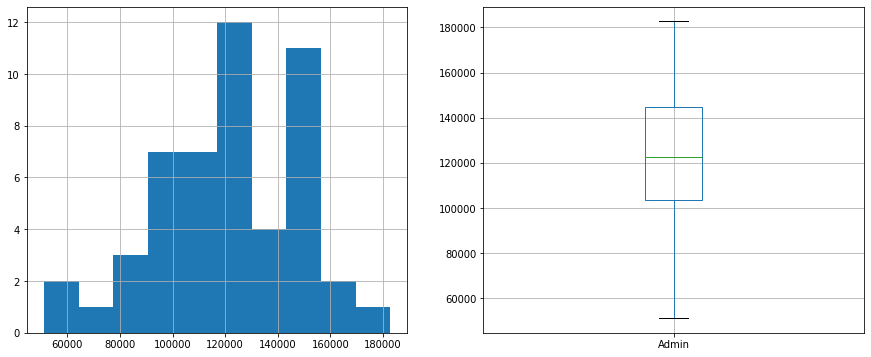

In [11]:

#check whether outliers are present in Admin column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Admin'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['Admin'])

plt.show()


There is no outlier present inside the Admin Column

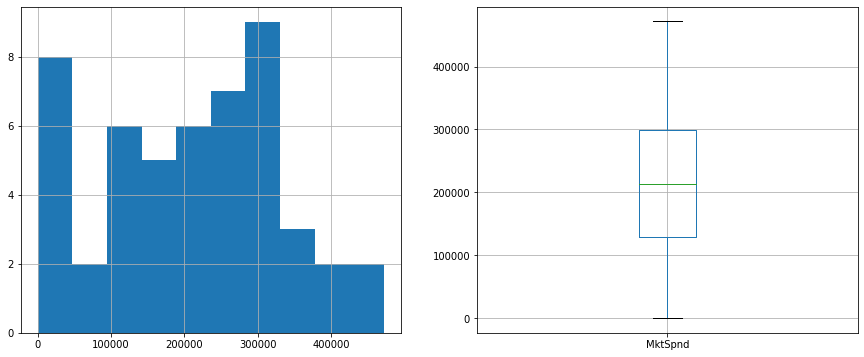

In [13]:
#check whether outliers are present in MktSpnd column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['MktSpnd'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['MktSpnd'])

plt.show()

There is no outlier present inside the MktSpnd column

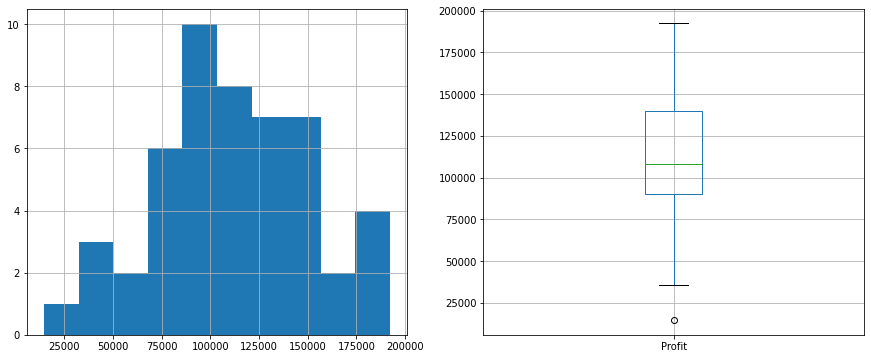

In [14]:
#check whether outliers are present in Profit column
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
startups2['Profit'].hist()
plt.subplot(1,2,2)
startups2.boxplot(column=['Profit'])

plt.show()

# Checking distribution of data using distplot

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Profit', ylabel='Density'>

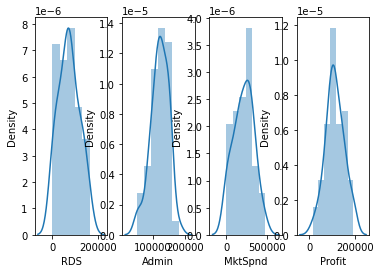

In [15]:
# plt.figure(figsize = (30,6))
plt.subplot(1,4,1)
sns.distplot(startups2['RDS'])
plt.subplot(1,4,2)
sns.distplot(startups2['Admin'])
plt.subplot(1,4,3)
sns.distplot(startups2['MktSpnd'])
plt.subplot(1,4,4)
sns.distplot(startups2['Profit'])

# Correlation Matrix

In [16]:
startups2.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


From the above correlation matrix we found that there is strong positive relation between Profit and R&D_S. And also the colinearity is not present in side the input data

# Scatterplot between variables along with histograms

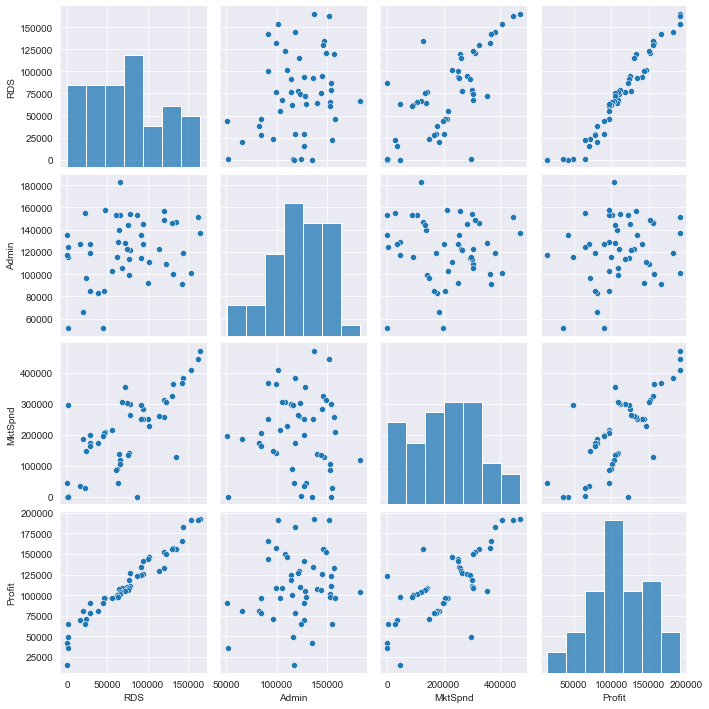

In [17]:

#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startups2)

# Try to fit a model for better profit


# Model1



# Predict a model for better profit with out using any transformation


In [18]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups2).fit()

In [19]:

#Coefficients
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

In [20]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


In [21]:

#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        12:15:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# From the above results we have that R-squared value is 0.951 and Adj.R-squared value is 0.948, both are greater than 0.85 which means this model1 is good for predict the profit.
But in above case some variables have p values greater than 0.05, so it is insignificant.
Hence try to do some other operation whether we can get a better model than this model1.

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\Home\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


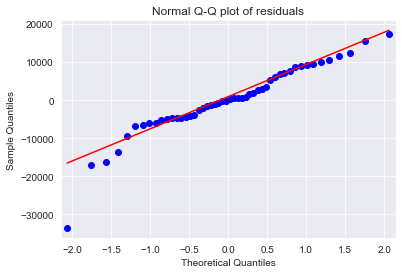

In [23]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


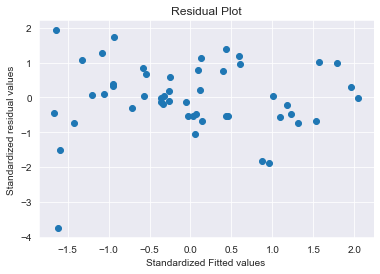

In [26]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


This above plot shows that the residuals following homoscedastcity

# Detecting Influencers/Outliers

# Cook’s Distance

In [27]:

model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

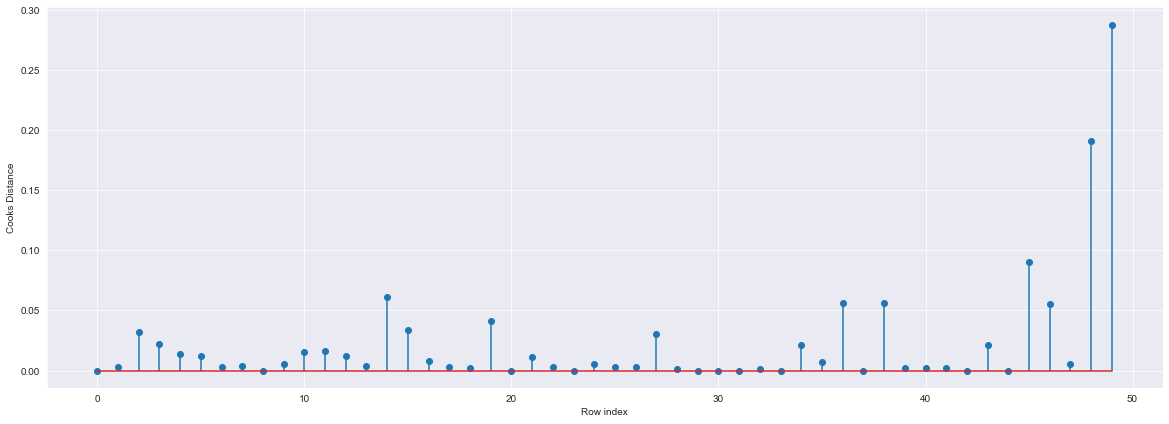

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

# We will do the leverage influence plot for detection of outlier in our dataset


# High influence point

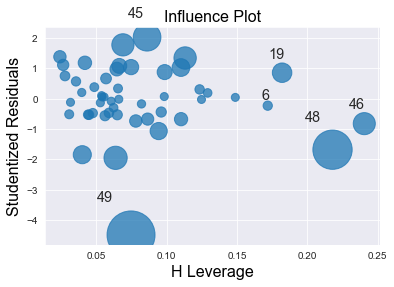

In [31]:

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [32]:
k = startups2.shape[1]
n = startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004


From the above plot, it is evident that data point 49 is the influencers

# We will remove the 49 from our dataset

In [33]:
startups2[startups2.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [34]:
startups3=startups2.drop(startups2.index[[49]],axis=0).reset_index()

In [35]:
startups3=startups3.drop(['index'],axis=1)

In [36]:
startups3

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Model2

# Predict a new model after removing influencers

In [37]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()

In [38]:
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           8.85e-32
Time:                        12:20:24   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here as per above observations we found R-squared value 0.961, which is greater than 0.85 as well as from the previous model. Hence we can say that this is good model for predict profit

But here pvalues of Admin and MktSpnd is greater than 0.05, it is in significant

# Model3

# Lets predict a model excluding Admin and MktSpnd variables

In [40]:
model3 = smf.ols('Profit~RDS', data = startups3).fit()

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           7.56e-34
Time:                        12:20:34   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RDS            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion - Comparing between all models , model2 has higher R-squared value i.e. 0.961 and lower AIC value i.e. 1021 as comapare to others.


# Hence model2 is better to predict the profit

In [42]:
pred = model2.predict(startups3.iloc[:,:3])
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [43]:
actual = startups3.Profit

In [44]:
from ml_metrics import rmse
rmse(pred,actual)

7430.589093678346

# Table of R-squared value for all model

In [45]:
df = {'Model':['Model1','Model2','Model3'],'R_Squared Value':[0.957,0.961,0.958]}

In [46]:

R_Square_Table = pd.DataFrame(df)
R_Square_Table

,Model,R_Squared Value
0,Model1,0.957
1,Model2,0.961
2,Model3,0.958
